In [45]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [54]:
a, b ,K, N, x, lmda, C, X, w, r = sp.symbols('a b K N x \lambda C X w r', real= True, positive= True)

In [47]:
def f(N ,K):
    return (N**0.5) * (K**0.5)
f(N,K)

K**0.5*N**0.5

In [48]:
K0 = 10
K1 = 50
r = 500
w = 350
fk = 10000

In [49]:
n_derivert = sp.lambdify(
    (x,K),
    sp.solve(sp.Eq(f(N,K), x), N)[0])

def C(N, K):
    return w*n_derivert(N, K) + r*K + fk

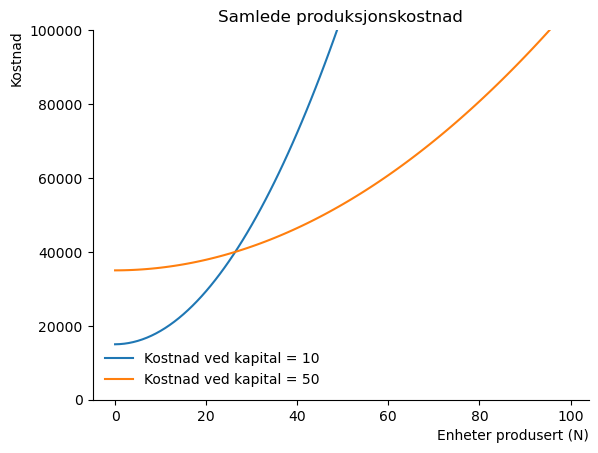

In [50]:
n=np.linspace(0.1,100,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kostnad', loc='top')
ax.set_xlabel('Enheter produsert (N)', loc='right')
ax.set(ylim=(0,100000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(C(n, K0), label="Kostnad ved kapital = 10")
ax.plot(C(n, K1), label="Kostnad ved kapital = 50")
ax.set_title('Samlede produksjonskostnad')
ax.legend(loc= 'best', frameon=False);

#det er en vesentlig forskjell på hvor fort kostnadene øker, og det vil være til fordel og gå for kostand ved kapital = 50 i lengden om man ønsker å billigst mulig produsere mange enheter.

In [51]:
gr_cost = sp.lambdify(
    (N, K),
    sp.diff(C(N, K), N)
)

def avg_cost(N, K):
    return C(N, K)/N

def avg_cost_wo_fk(N, K):
    return (C(N, K)-fk)/N

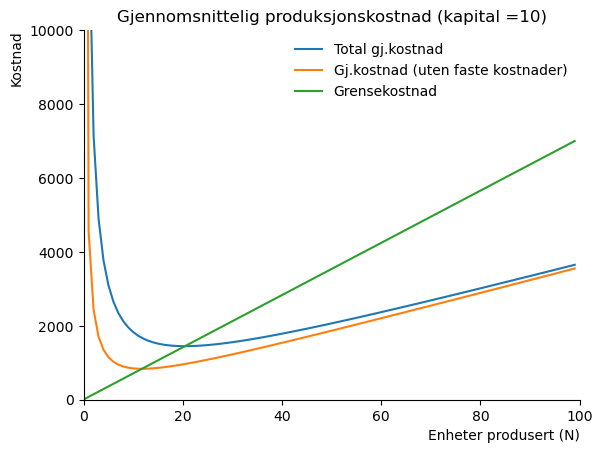

In [52]:
fig1, ax = plt.subplots()
ax.set_ylabel('Kostnad', loc='top')
ax.set_xlabel('Enheter produsert (N)', loc='right')
ax.set(ylim=(0,10000))
ax.set_xlim(0, 100)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(avg_cost(n, K0), label="Total gj.kostnad")
ax.plot(avg_cost_wo_fk(n, K0), label="Gj.kostnad (uten faste kostnader)")
ax.plot(gr_cost(n, K0), label="Grensekostnad")
ax.set_title('Gjennomsnittelig produksjonskostnad (kapital =10)')
ax.legend(loc= 'best', frameon=False);

#Oppgave 1b 
#grensekonstandslinjen viser til hvor mange enheter som kan produseres til lavest mulig pris, her ser vi at
#den orange linja har et lavere punkt i forhold til den lå linja. 

#oppgave 1c
#Grensekonstandslinja viser oss at det er et konstant skalautbytte, vinkelen til grensekostnadslinja forteller oss at hver nye enhet som produseres vil bli desto dyrere.

In [55]:
def x(N,K):
    return (N**a)*(K**b)
x(N,K)

L=w*N + r*K-lmda*(x(N,K)-X)

dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)

rel_w=(dL_N.args[0]/dL_K.args[0])

mtsb=(dL_N.args[1]/dL_K.args[1])

optimal=sp.Eq(rel_w,mtsb)

display(optimal)

Eq(w/r, K*a/(N*b))

In [10]:
#Oppgave 2
#Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)?

#Fordi vi har et konstant skalautbytte vil endringene mellom enheter produsert og kostnad være proposjonale.